In [1]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [4]:

path = 'porcentajeDeMujeres.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

,t,MSt,TSt,PMS
0,2010,3,29,10.344828
1,2011,10,75,13.333333
2,2012,22,129,17.054264
3,2013,11,79,13.924051
4,2014,6,78,7.692308


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
t      9 non-null int64
MSt    9 non-null int64
TSt    9 non-null int64
PMS    9 non-null float64
dtypes: float64(1), int64(3)
memory usage: 416.0 bytes


In [6]:
df.shape

(9, 4)

In [7]:
df.shape[0]

9

In [8]:
df.columns.values.tolist()


['t', 'MSt', 'TSt', 'PMS']

In [9]:
df.dtypes

t        int64
MSt      int64
TSt      int64
PMS    float64
dtype: object

In [10]:
df.isnull().any().any()

False

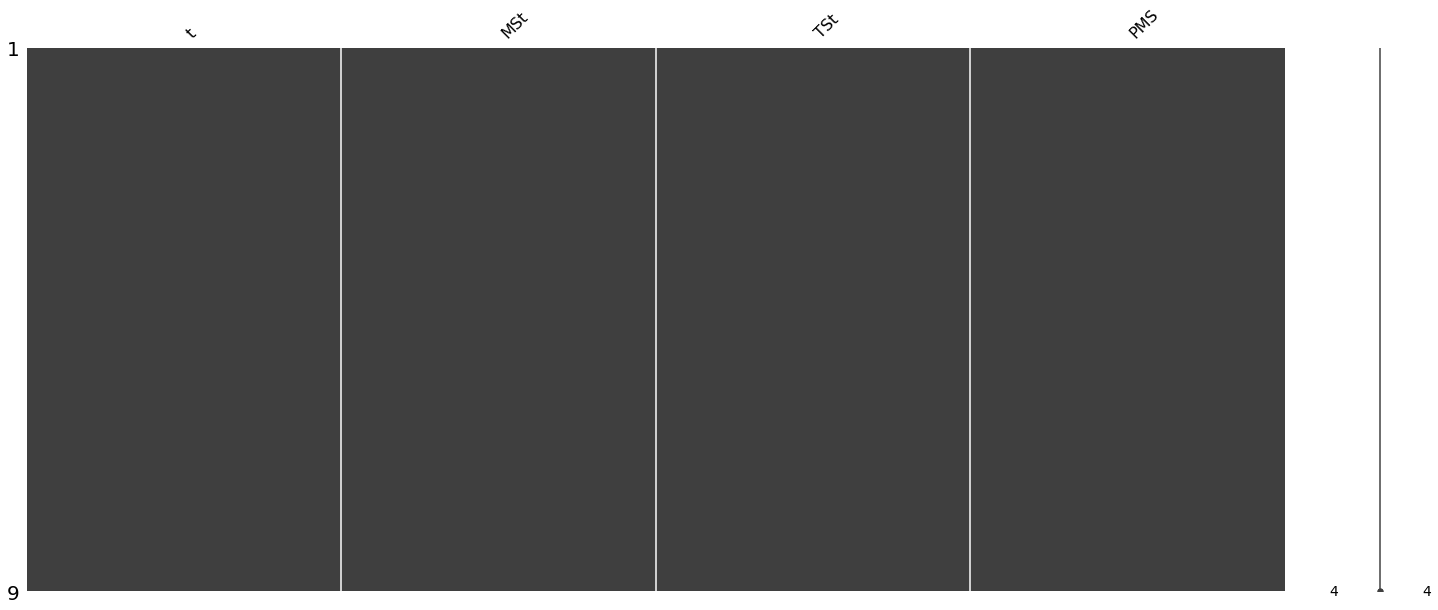

In [11]:
msno.matrix(df)

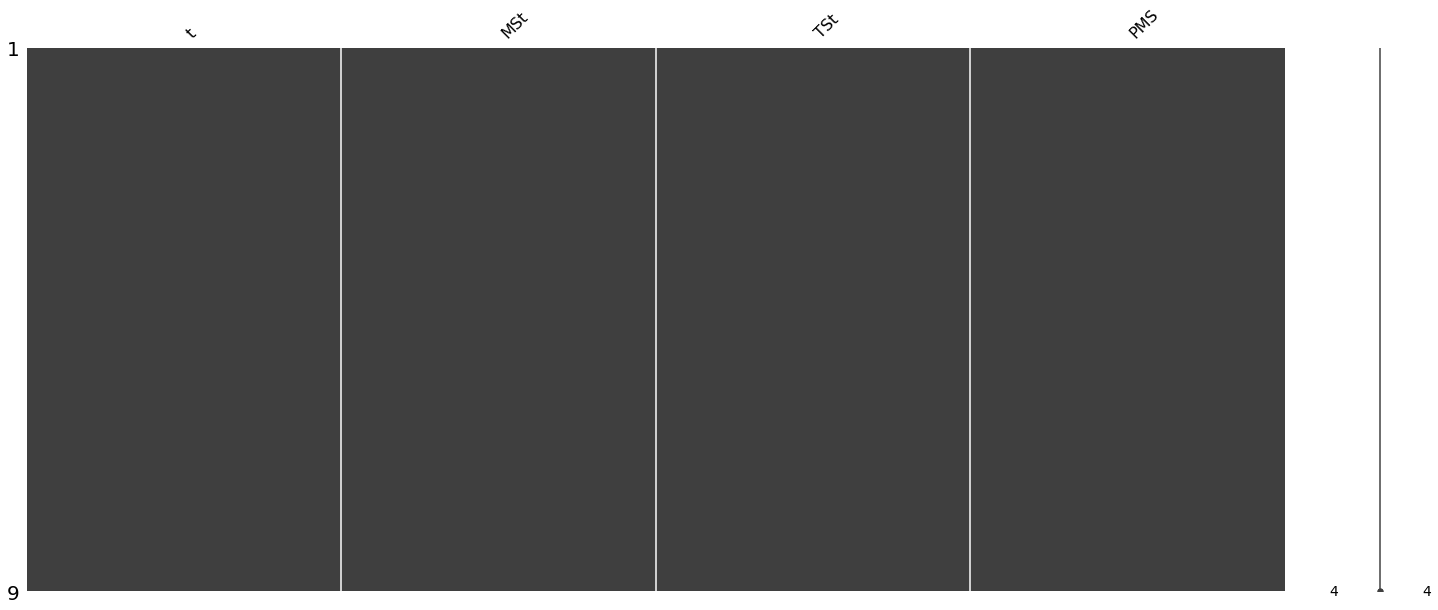

In [14]:
msno.matrix(df)

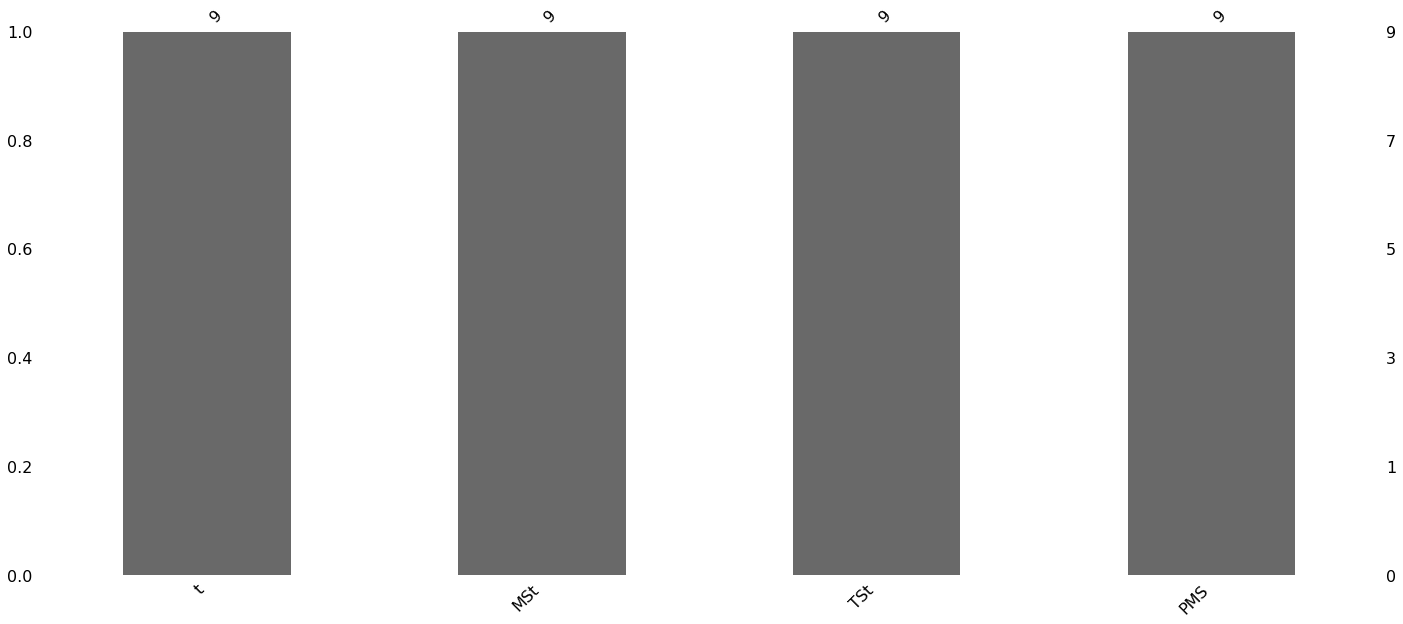

In [16]:
msno.bar(df)

In [17]:
df.columns[df.isnull().any()].tolist()


[]

In [18]:
df.describe()

,t,MSt,TSt,PMS
count,9.000000,9.000000,9.000000,9.000000
mean,2014.000000,14.111111,100.333333,13.525844
std,2.738613,8.038104,44.070965,3.625913
min,2010.000000,3.000000,29.000000,7.692308
25%,2012.000000,10.000000,75.000000,10.344828
50%,2014.000000,11.000000,79.000000,13.924051
75%,2016.000000,22.000000,129.000000,16.875000
max,2018.000000,27.000000,160.000000,17.886179


In [19]:
df.loc[[0]]

,t,MSt,TSt,PMS
0,2010,3,29,10.344828


In [23]:
df.loc[1:4]

,t,MSt,TSt,PMS
1,2011,10,75,13.333333
2,2012,22,129,17.054264
3,2013,11,79,13.924051
4,2014,6,78,7.692308


In [24]:
df.drop(df.index[1:5], axis=0).head(10)

,t,MSt,TSt,PMS
0,2010,3,29,10.344828
5,2015,11,73,15.068493
6,2016,22,123,17.886179
7,2017,15,157,9.554140
8,2018,27,160,16.875000


In [30]:
df[4:].head() #df.tail(-100) )

,t,MSt,TSt,PMS
4,2014,6,78,7.692308
5,2015,11,73,15.068493
6,2016,22,123,17.886179
7,2017,15,157,9.554140
8,2018,27,160,16.875000


In [39]:
df.t.values

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [40]:
df['t'].values

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [41]:
df.t.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [42]:
df.t.value_counts()

2015    1
2014    1
2013    1
2012    1
2011    1
2010    1
2018    1
2017    1
2016    1
Name: t, dtype: int64

In [43]:
df.agg(['count', 'size', 'nunique'])

,t,MSt,TSt,PMS
count,9,9,9,9
size,9,9,9,9
nunique,9,7,9,9


In [44]:
df.groupby('t').agg(['count', 'size', 'nunique']).stack()

MSt  TSt  PMS
t                          
2010 count      1    1    1
     size       1    1    1
     nunique    1    1    1
2011 count      1    1    1
     size       1    1    1
     nunique    1    1    1
2012 count      1    1    1
     size       1    1    1
     nunique    1    1    1
2013 count      1    1    1
     size       1    1    1
     nunique    1    1    1
2014 count      1    1    1
     size       1    1    1
     nunique    1    1    1
2015 count      1    1    1
     size       1    1    1
     nunique    1    1    1
2016 count      1    1    1
     size       1    1    1
     nunique    1    1    1
2017 count      1    1    1
     size       1    1    1
     nunique    1    1    1
2018 count      1    1    1
     size       1    1    1
     nunique    1    1    1

In [45]:
df.groupby('t').agg(['count', 'size', 'nunique'])

MSt                TSt                PMS             
     count size nunique count size nunique count size nunique
t                                                            
2010     1    1       1     1    1       1     1    1       1
2011     1    1       1     1    1       1     1    1       1
2012     1    1       1     1    1       1     1    1       1
2013     1    1       1     1    1       1     1    1       1
2014     1    1       1     1    1       1     1    1       1
2015     1    1       1     1    1       1     1    1       1
2016     1    1       1     1    1       1     1    1       1
2017     1    1       1     1    1       1     1    1       1
2018     1    1       1     1    1       1     1    1       1

In [49]:
df.shape

(9, 4)

In [50]:
df_sample.shape

(0, 4)

In [52]:
df_dropped = df.dropna(subset=['t'])
df_dropped.head()

,t,MSt,TSt,PMS
0,2010,3,29,10.344828
1,2011,10,75,13.333333
2,2012,22,129,17.054264
3,2013,11,79,13.924051
4,2014,6,78,7.692308


In [53]:
df_dropped.shape

(9, 4)

In [54]:
df_copy = df.copy()
df_copy.head()

,t,MSt,TSt,PMS
0,2010,3,29,10.344828
1,2011,10,75,13.333333
2,2012,22,129,17.054264
3,2013,11,79,13.924051
4,2014,6,78,7.692308


In [55]:
df_copy.shape

(9, 4)

In [58]:
df_dropped['MSt'].dtype

dtype('int64')

In [59]:
df_dropped['MSt'].mean() 

14.11111111111111

In [60]:
df_copy['MSt'].fillna(value=np.round(df['MSt'].mean(),decimals=0), inplace=True)

In [61]:
df_copy.agg(['count', 'size', 'nunique'])

,t,MSt,TSt,PMS
count,9,9,9,9
size,9,9,9,9
nunique,9,7,9,9


In [62]:
list(df['TSt'].unique())

[29, 75, 129, 79, 78, 73, 123, 157, 160]

In [65]:
df['TSt'].replace({29:"TSt1", 
                       75:"TSt2",
                       129:"TSt3", 
                       79:"TSt4", 
                       73:"TSt5", 
                       123:"TSt6",
                    157:"TSt7",
                    160:"TSt8"}, inplace=True)

In [66]:
list(df['TSt'].unique())

['TSt1', 'TSt2', 'TSt3', 'TSt4', 78, 'TSt5', 'TSt6', 'TSt7', 'TSt8']

In [67]:
keys = list(df['TSt'].unique())
vals = range(1,8)
act = dict(zip(keys, vals))
act

{'TSt1': 1, 'TSt2': 2, 'TSt3': 3, 'TSt4': 4, 78: 5, 'TSt5': 6, 'TSt6': 7}

In [68]:
df_copy['TSt'] = df['TSt'].map(act)
df_copy.head()

,t,MSt,TSt,PMS
0,2010,3,1.0,10.344828
1,2011,10,2.0,13.333333
2,2012,22,3.0,17.054264
3,2013,11,4.0,13.924051
4,2014,6,5.0,7.692308


In [69]:
list(df_copy['TSt'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, nan]

In [70]:
df_copy['PMS'].mean()

13.525843891111114

In [71]:
df_copy['PMS'][df_copy['TSt'] == 6]

5    15.068493
Name: PMS, dtype: float64

In [72]:
df_copy['PMS'][df_copy['TSt'] == 6].mean

<bound method Series.mean of 5    15.068493
Name: PMS, dtype: float64>

In [73]:
df_copy.groupby(["t", "MSt", "TSt", "PMS"]).count()


,,,
t,MSt,TSt,PMS
2010,3,1.0,10.344828
2011,10,2.0,13.333333
2012,22,3.0,17.054264
2013,11,4.0,13.924051
2014,6,5.0,7.692308
2015,11,6.0,15.068493
2016,22,7.0,17.886179


In [76]:
df_copy.groupby(["t", "MSt"])[[ "TSt", "PMS"]].count()

,,TSt,PMS
t,MSt,,
2010,3,1,1
2011,10,1,1
2012,22,1,1
2013,11,1,1
2014,6,1,1
2015,11,1,1
2016,22,1,1
2017,15,0,1
2018,27,0,1


In [77]:
df_copy.groupby(["t", "MSt"])[["TSt", "PMS"]].count()

,,TSt,PMS
t,MSt,,
2010,3,1,1
2011,10,1,1
2012,22,1,1
2013,11,1,1
2014,6,1,1
2015,11,1,1
2016,22,1,1
2017,15,0,1
2018,27,0,1


In [79]:
df_copy.t

0    2010
1    2011
2    2012
3    2013
4    2014
5    2015
6    2016
7    2017
8    2018
Name: t, dtype: int64

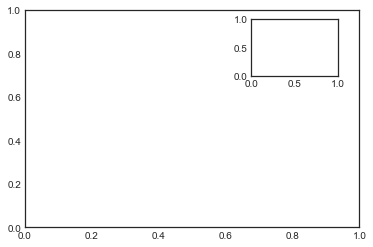

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

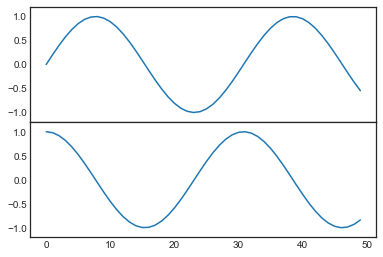

In [83]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

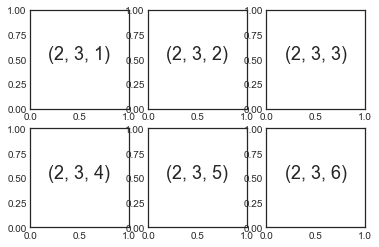

In [84]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

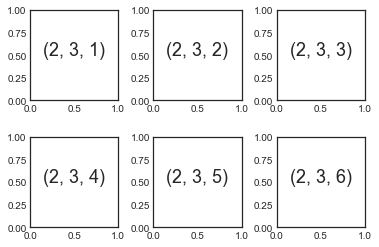

In [85]:
# plt.subplots_adjust can be used to adjust the spacing between these plots
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

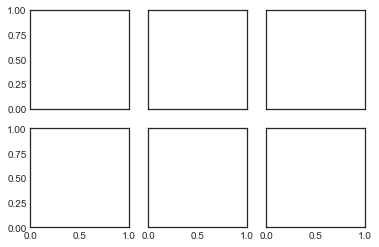

In [86]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')


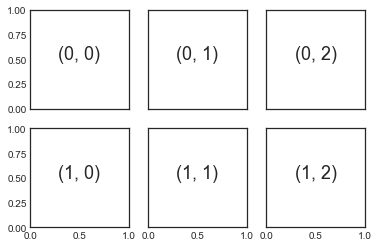

In [87]:
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

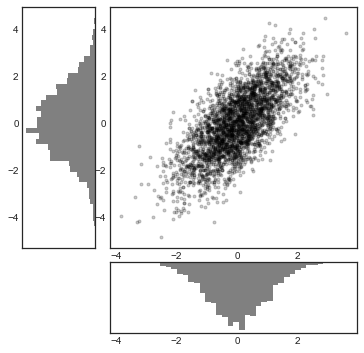

In [88]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()


Text(0.5, 1.0, 'Frequency of ventas')

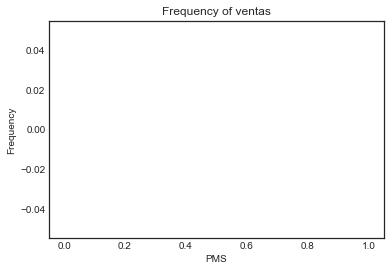

In [110]:
plt.hist(df_sample['MSt'])
plt.xlabel('PMS')
plt.ylabel('Frequency')
plt.title('Frequency of ventas')

Text(0.5, 1.0, 'Box Plot of ventas count')

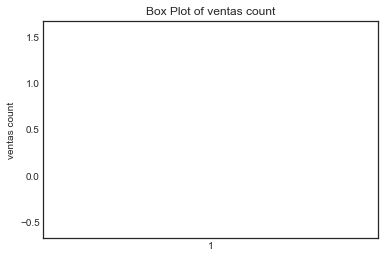

In [111]:
#plt.boxplot(df_sample['ventas'])
plt.boxplot(df_sample['t'], showmeans=True, meanline=True)
plt.ylabel('ventas count')
plt.title('Box Plot of ventas count')